In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv('risk_factors_cervical_cancer.csv')

In [12]:
df.replace('?', np.NaN, inplace=True)
df.drop_duplicates()  #ok there aren't any duplicates

def compute_grade(df):    
    if (df['Biopsy']==1) | (df['Hinselmann'] == 1) | (df['Schiller'] == 1) | (df['Citology'] == 1):
        return 1
    else:
        return 0

df['target'] = df.apply(compute_grade, axis = 1)
df = df.drop(['Hinselmann', 'Schiller', 'Biopsy', 'Citology'], axis = 1)


In [13]:
#split dataset 80% trainning and 20% test set.
train_data, test_data = train_test_split(df, test_size=0.20)

In [14]:
train_data = train_data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1) #drop this columns, because they contains too much nulls
train_data= train_data.fillna(train_data.median()) #replace null values with the median value of the column
train_data['Age'] =( train_data['Age'] - train_data['Age'].mean() ) / train_data['Age'].std()  #standarilazation of Age


for x in list(train_data.keys()): 
    train_data[x] = train_data[x].astype('float')
    if (x!='Smokes' and x!='Smokes (packs/year)' and x!='Hormonal Contraceptives (years)' and x!='IUD (years)'): #because these columns must remain float
        train_data[x]=train_data[x].apply(np.int64)

Text(0.5, 1.0, 'Correlation Heatmap')

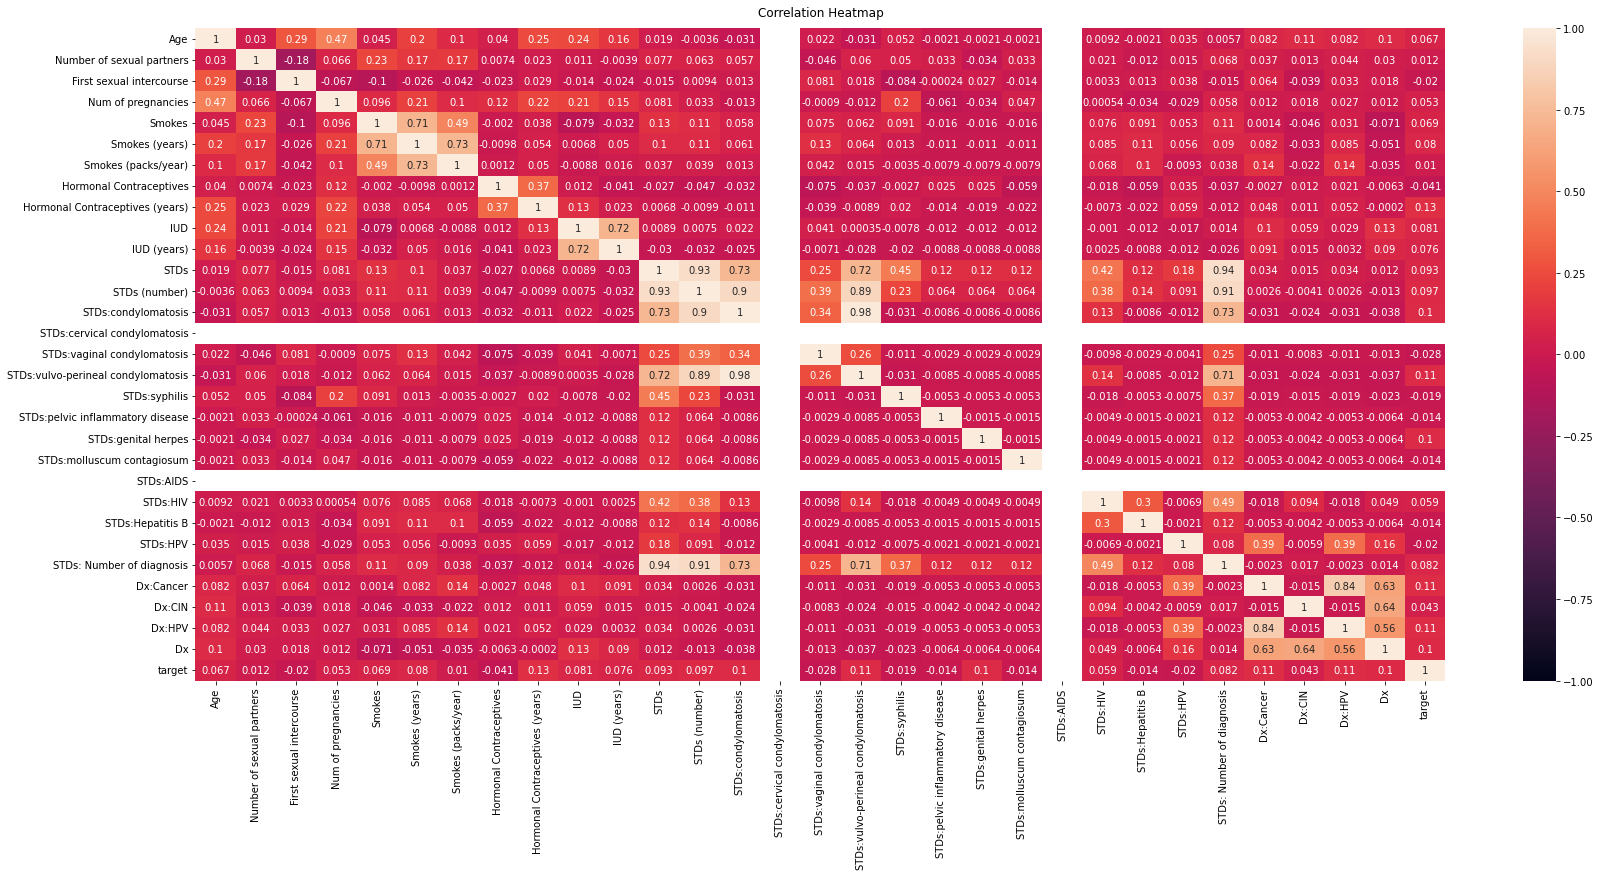

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 12))
heatmap = sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

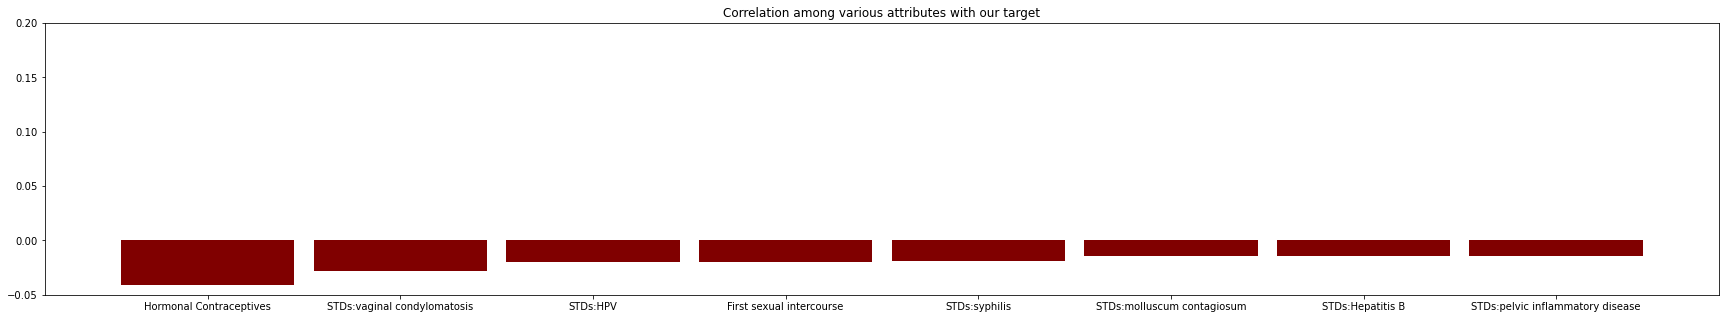

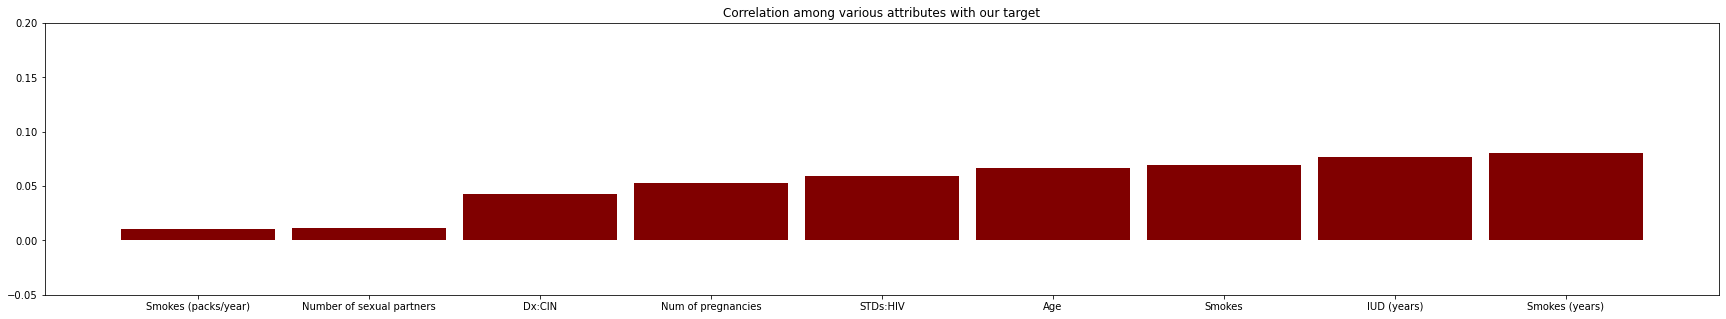

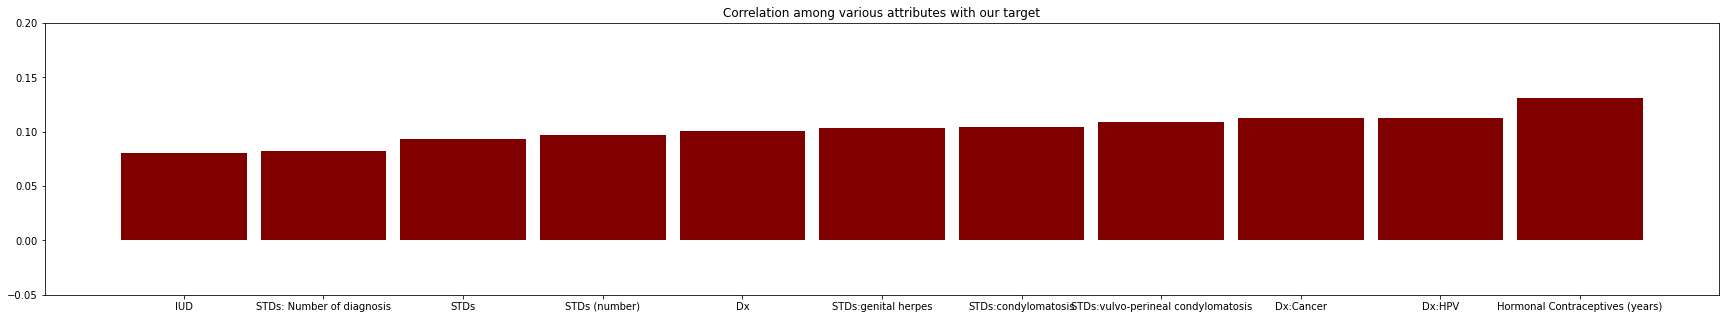

In [16]:
#plot and see how much every variable is related to the target
#If the value is 0, there is no correlation between the two variables. This means that the variables changes in a random manner with respect to each other.
import numpy as np 
import matplotlib.pyplot as plt
df2=train_data.corr()
df3=df2['target']
df4=df3.to_frame()
df5=df4.sort_values(by=['target'])


df5a=df5.iloc[0:8]
my_keys = list(df5a.index) 
values = list(df5a['target'])
fig = plt.figure(figsize = (30, 5))
plt.bar(my_keys, values, color ='maroon', width = 0.9) 
ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()


df5b=df5.iloc[8:17]
my_keys = list(df5b.index) 
values = list(df5b['target'])

fig = plt.figure(figsize = (30, 5))

plt.bar(my_keys, values, color ='maroon', width = 0.9) 

ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()

df5c=df5.iloc[17:28]
my_keys = list(df5c.index) 
values = list(df5c['target'])

fig = plt.figure(figsize = (30, 5))

plt.bar(my_keys, values, color ='maroon', width = 0.9) 

ax = plt.gca()
ax.set_ylim([-0.05, 0.2])
plt.title("Correlation among various attributes with our target") 
plt.show()

In [19]:
df4['target']=abs(df4['target'])
df6=df4.sort_values(by=['target']) #sort attributes from the most unrelated to the most related
df4=df4.drop(['target'], axis=1)
print('Most correlated attributes to the target in ascending order: ')
print('')
print(list(df6.index))
df6

Most correlated attributes to the target in ascending order: 

['Smokes (packs/year)', 'Number of sexual partners', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'STDs:molluscum contagiosum', 'STDs:syphilis', 'First sexual intercourse', 'STDs:HPV', 'STDs:vaginal condylomatosis', 'Hormonal Contraceptives', 'Dx:CIN', 'Num of pregnancies', 'STDs:HIV', 'Age', 'Smokes', 'IUD (years)', 'Smokes (years)', 'IUD', 'STDs: Number of diagnosis', 'STDs', 'STDs (number)', 'Dx', 'STDs:genital herpes', 'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'Dx:Cancer', 'Dx:HPV', 'Hormonal Contraceptives (years)', 'target', 'STDs:cervical condylomatosis', 'STDs:AIDS']


,target
Smokes (packs/year),0.010238
Number of sexual partners,0.011633
STDs:pelvic inflammatory disease,0.014175
STDs:Hepatitis B,0.014175
STDs:molluscum contagiosum,0.014175
STDs:syphilis,0.018781
First sexual intercourse,0.019729
STDs:HPV,0.020062
STDs:vaginal condylomatosis,0.028413
Hormonal Contraceptives,0.040982


In [20]:
print('So, for the feature selection, we can choose the 22(WHY 22??) most related attributes to our target, which are:')  
print('')
print(list(df6.index)[9:])

#drop the most unrelated attributes
train_data = train_data.drop(['Smokes (packs/year)', 'First sexual intercourse', 'STDs:Hepatitis B', 'STDs:pelvic inflammatory disease', 'STDs:syphilis', 'Age',  'Num of pregnancies', 'Number of sexual partners'], axis = 1)

So, for the feature selection, we can choose the 22(WHY 22??) most related attributes to our target, which are:

['Hormonal Contraceptives', 'Dx:CIN', 'Num of pregnancies', 'STDs:HIV', 'Age', 'Smokes', 'IUD (years)', 'Smokes (years)', 'IUD', 'STDs: Number of diagnosis', 'STDs', 'STDs (number)', 'Dx', 'STDs:genital herpes', 'STDs:condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'Dx:Cancer', 'Dx:HPV', 'Hormonal Contraceptives (years)', 'target', 'STDs:cervical condylomatosis', 'STDs:AIDS']


In [173]:
#The attributes “STDs”, “STDs_vulvo_perineal_condylomatosis” and “STDs_condylomatosis” have a high correlation among themselves. 
#So, we removed the attributes “STDs_vulvo_perineal_condylomatosis” and “STDs_condylomatosis” from the data set. 
#Also, a high correlation  exists between “STDs_number” and “STDs_No_of_diagnosis”. 
#So, we removed “STDs_No_of_diagnosis” attribute from the data set.
train_data = train_data.drop(['STDs:vulvo-perineal condylomatosis', 'STDs:condylomatosis', 'STDs: Number of diagnosis'], axis = 1)

Before oversampling:  Counter({0: 603, 1: 83})


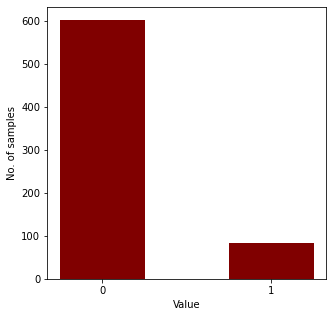

After  oversampling:  Counter({0: 603, 1: 603})


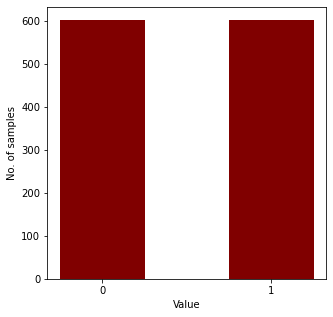

In [21]:
#Apply BorderlineSMOTE (oversampling Method) after splitting the dataset. Because we do not need to change the test set data, we just need to balance the train data set, so that our model won't be biased
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where

X_train=train_data.drop(['target'], axis = 1).values
y_train=train_data['target'].values
counter = Counter(y_train)
print('Before oversampling: ',counter)

data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()

oversample = BorderlineSMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print('After  oversampling: ',counter)
data = {'0':counter[0], '1':counter[1], }
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (5, 5))
plt.bar(courses, values, color ='maroon', width = 0.5)
plt.xlabel("Value")
plt.ylabel("No. of samples")
plt.show()
